Regresión Logistica 

Pedro Daniel Ospina Arias - Unad 

1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

import pandas as pd # Manejo y analisis de estructuras de datos
import numpy as np # Caclculo numerico y el analisis de datos
import seaborn as sns # Creaciòn graficos estadisticos
import matplotlib.pyplot as plt # Creaciòn de graficos en dos dimensiones

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [8]:
# Lectura de datos para el ejercicio de regesión logistica

Base_datos = pd.read_csv('C:/Users/Pedro/Desktop/10 Semestre/Analisis de datos/Actividad 3/heart_cleveland_upload.csv')  # C:/unad/tarea_3/Diabetes.csv

NameError: name 'pd' is not defined

In [45]:
# Lectura para el analisis exploratorio

Base_datos.head(80)  #40


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,69,1,2,140,254,0,2,146,0,2.0,1,3,2,1
76,68,1,2,180,274,1,2,150,1,1.6,1,0,2,1
77,68,0,2,120,211,0,2,115,0,1.5,1,0,0,0
78,68,1,2,118,277,0,0,151,0,1.0,0,1,2,0


In [47]:
#Descripciòn de los datos
Base_datos.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.396745,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,0.938977,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,1.055556,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Identificación de datos faltantes y Atipicos')

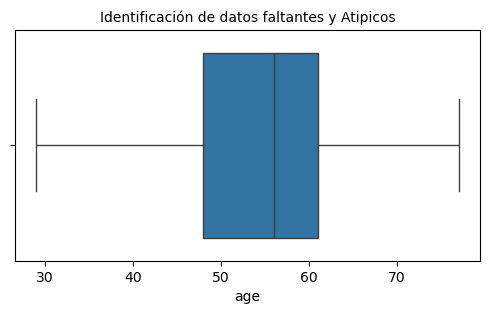

In [31]:
# Identificaciòn de datos Faltantes y atipicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Base_datos['age'])
plt.title('Identificación de datos faltantes y Atipicos', fontsize =10)


Text(0.5, 1.0, 'Identificación de datos faltantes y Atipicos')

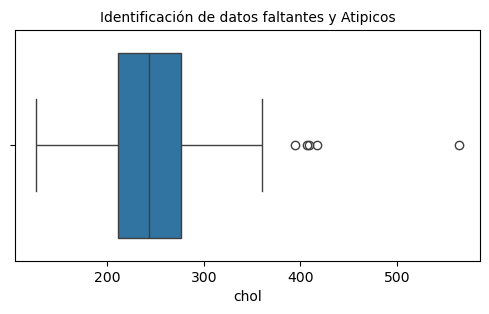

In [35]:
# Identificaciòn de datos Faltantes y atipicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Base_datos['chol'])
plt.title('Identificación de datos faltantes y Atipicos', fontsize =10)


2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [37]:
# Revision de datos faltantes

print("Cantidad de Registros con cero en trestbps: ",Base_datos ['trestbps'].isin([0]).sum())
print("Cantidad de Registros con cero en chol: ",Base_datos ['chol'].isin([0]).sum())
print("Cantidad de Registros con cero en thalach: ",Base_datos ['thalach'].isin([0]).sum())
print("Cantidad de Registros con cero en oldpeak: ",Base_datos ['oldpeak'].isin([0]).sum())




Cantidad de Registros con cero en trestbps:  0
Cantidad de Registros con cero en chol:  0
Cantidad de Registros con cero en thalach:  0
Cantidad de Registros con cero en oldpeak:  96


In [41]:

# Remplazar todos los datos en 0 por el valor promedio para el campo oldpeak
Base_datos['oldpeak']=Base_datos['oldpeak'].replace(0,Base_datos['oldpeak'].mean())



In [43]:
# Revision de datos faltantes

print("Cantidad de Registros con cero en trestbps: ",Base_datos ['trestbps'].isin([0]).sum())
print("Cantidad de Registros con cero en chol: ",Base_datos ['chol'].isin([0]).sum())
print("Cantidad de Registros con cero en thalach: ",Base_datos ['thalach'].isin([0]).sum())
print("Cantidad de Registros con cero en oldpeak: ",Base_datos ['oldpeak'].isin([0]).sum())



Cantidad de Registros con cero en trestbps:  0
Cantidad de Registros con cero en chol:  0
Cantidad de Registros con cero en thalach:  0
Cantidad de Registros con cero en oldpeak:  0


Text(0.5, 1.0, 'Identificación de datos Atipicos')

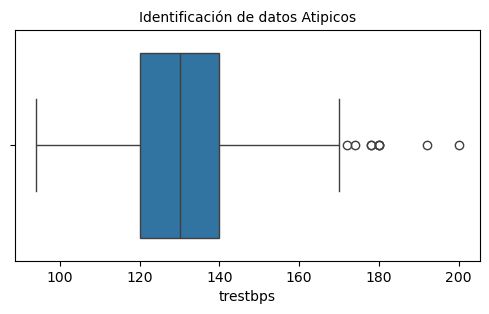

In [63]:
#Identificaciòn de datos atipicos 

plt.figure(figsize=(6, 3))
sns.boxplot(x=Base_datos['trestbps'])
plt.title('Identificación de datos Atipicos', fontsize =10)

In [69]:
#Conteo de datos Atipicos

nivel_minimo = 120
nivel_maximo = 180
Numero_total_atipicos=((Base_datos['trestbps']<nivel_minimo)|(Base_datos['trestbps']>nivel_maximo)).sum()
print("El numero total de datos atipicos es {}".format(Numero_total_atipicos))

El numero total de datos atipicos es 62


In [75]:
# Filtrar datos Atipicos
Base_datos=Base_datos[(Base_datos['trestbps']<nivel_maximo)&(Base_datos['trestbps']>nivel_minimo)]



In [77]:
# Validar su se removieron los datos atipicos

Numero_total_atipicos=((Base_datos['trestbps']<nivel_minimo)|(Base_datos['trestbps']>nivel_maximo)).sum()
print("El numero total de datos atipicos es {}".format(Numero_total_atipicos))

El numero total de datos atipicos es 0


In [79]:
# Revisión del tipo de datos y datos faltantes

Base_datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        195 non-null    int64  
 1   sex        195 non-null    int64  
 2   cp         195 non-null    int64  
 3   trestbps   195 non-null    int64  
 4   chol       195 non-null    int64  
 5   fbs        195 non-null    int64  
 6   restecg    195 non-null    int64  
 7   thalach    195 non-null    int64  
 8   exang      195 non-null    int64  
 9   oldpeak    195 non-null    float64
 10  slope      195 non-null    int64  
 11  ca         195 non-null    int64  
 12  thal       195 non-null    int64  
 13  condition  195 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 22.9 KB


3. Seleccionar las características más relevantes para entrenar el 
modelo utilizando selección de características.

In [83]:
# Total de persona con enfermedad cardiaca
Base_datos['condition'].value_counts()

condition
0    99
1    96
Name: count, dtype: int64

In [89]:
Base_datos[['condition']].head(40)

,condition
0,0
1,0
2,0
3,1
5,0
6,0
7,1
8,0
9,0
10,1


4. Dividir el dataset en Train y Test para evaluar correctamente el 
modelo. 

In [93]:
# Porcentaje de datos para entrenamiento (train) = 70% , y para prueba (test) = 30%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = Base_datos.drop('condition',axis=1) # Se cargan los datos de train sin los datos de la columna Diabetico 
Y = Base_datos['condition'] # Se cargan los datos de train con los datos de la la columna Diabetico

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, stratify=Y, random_state= 0)

In [95]:
print(X_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang   oldpeak  \
25    70    1   1       156   245    0        2      143      0  1.055556   
232   57    0   3       128   303    0        2      159      0  1.055556   
60    44    1   1       130   219    0        2      188      0  1.055556   
64    41    0   1       130   204    0        2      172      0  1.400000   
236   56    1   3       125   249    1        2      144      1  1.200000   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...       ...   
277   45    1   3       142   309    0        2      147      1  1.055556   
6     63    1   0       145   233    1        2      150      0  2.300000   
283   43    0   3       132   341    1        2      136      1  3.000000   
264   50    1   3       144   200    0        2      126      1  0.900000   
221   58    1   3       125   300    0        2      171      0  1.055556   

     slope  ca  thal  
25       0   0     0  
232      0   1     0  
60    

In [97]:
print (Y_train)

25     0
232    0
60     0
64     0
236    1
      ..
277    1
6      0
283    1
264    1
221    1
Name: condition, Length: 136, dtype: int64


5.  Entrenar el modelo configurando los diferentes 
hiperparámetros. 

In [99]:
# Construir el modelo de regresión logística 

hiperparametros = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
hiperparametros.fit (X_train , Y_train)   

# Crea el modelo de prediccion
prueba = hiperparametros.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación

In [101]:
print (Y_test)

263    1
90     0
139    0
17     0
214    1
106    1
142    0
40     0
81     0
134    0
194    1
132    0
288    1
225    1
220    1
229    1
58     0
147    0
105    0
160    1
193    1
216    1
155    1
176    0
260    1
74     1
197    1
239    1
72     0
262    1
83     0
201    1
244    1
289    0
11     1
180    1
199    1
143    0
190    1
10     1
285    0
24     0
249    0
3      1
42     0
97     0
182    1
183    1
276    0
87     1
102    0
50     0
251    0
126    1
119    0
207    0
218    0
41     0
268    0
Name: condition, dtype: int64


In [103]:
print(prueba)

[1 1 0 0 1 1 0 0 0 0 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0]


6. Evaluar el desempeño del modelo en el conjunto de Test con 
métricas como precisión, recall, F1-score, etc. 

In [105]:
# Desempeño del modelo de regresión

print(classification_report(Y_test,prueba))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        30
           1       0.88      0.79      0.84        29

    accuracy                           0.85        59
   macro avg       0.85      0.85      0.85        59
weighted avg       0.85      0.85      0.85        59



7. Realizar las diferentes gráficas que permitan visualizar los 
resultados del modelo. 

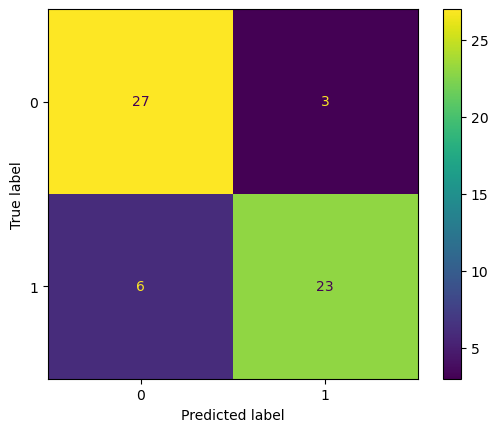

In [107]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,prueba)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

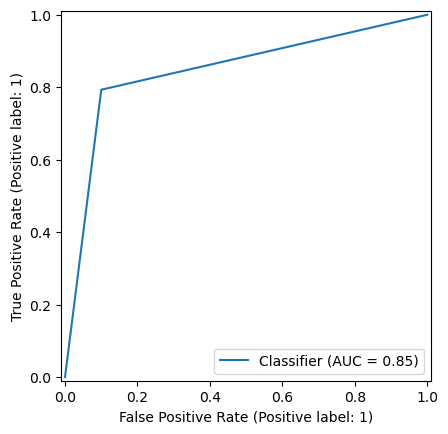

In [109]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, prueba)
plt.show()

8. Interpretar, analizar y documentar los resultados obtenidos

Del desempeño del modelo se puede detacar:

Precisión: Precisión mide la proporción de predicciones positivas verdaderas entre todas las predicciones positivas realizadas por el modelo. La precisión para la clase "Enfermedad cardiaca" es 0,82, en este sentido hace alusión al 82% de las personas que tiene enfermedad cardiaca por el modelo realizado.

Recall: Mide la proporción de predicciones positivas verdaderas entre todas las instancias positivas reales en el conjunto de datos. Para la clase "condición" es 0,79, lo que indica que el modelo identificó correctamente al 79% de todos los que presentan la enfermedad.

F1 Score: Es la media armónica de precisión y recuperación. Proporciona una puntuación única que equilibra la Precisión y Recall. Aquí la puntuación F1 para la clase "condición" es 0,84, lo que indica un equilibrio entre precisión y recuerdo.

De la Matriz de Confusión podemos interpretar:

Verdaderos negativos: el recuento de observaciones que un clasificador predijo correctamente como falso 27

Verdaderos positivos: el recuento de observaciones que un clasificador predijo correctamente como Verdadero 23

Falsos positivos: el recuento de observaciones que un clasificador predijo incorrectamente como Verdaderas 3

Falsos negativos: el recuento de observaciones que un clasificador predijo incorrectamente como falso 6

De la curva de precisión del modelo se puede interpretar:

El AUC es 0,85 lo que significa que el 69 % de las predicciones del clasificador son correctas en todos los umbrales de clasificación.